<a href="https://colab.research.google.com/github/Akshitasama/akshita_INFO5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [14]:
# Write your code here


# Write your code here
import pandas as pd
import requests
from bs4 import BeautifulSoup
def insert_array(values,refer_array):
  for x in values:
    refer_array.append(x.text)
titles=[]
for x in range(0,100,10):
  link="http://citeseerx.ist.psu.edu/search?q=data+science&t=doc&sort=rlv&start="+str(i)
  page=requests.get(link,headers={'User-Agent':'Chrome/85.0.4183.121'})
  soup = BeautifulSoup(page.content, 'html.parser')
  insert_array(soup.find_all('a', class_='remove doc_details'),titles)
print(titles)
data_frame = pd.DataFrame (titles,columns=['titles'])

['\n                   How Computational Statistics Became the Backbone of Modern Data Science\n', '\n                  Efficient Search for Approximate Nearest Neighbor in High Dimensional Spaces\n                  ', '\n                  Model selection in ecology and evolution.\n                  ', '\n                  Local Ground:\xa0 A\xa0Toolkit\xa0Supporting\xa0Metarepresentational Competence in\xa0Data\xa0Science\n', '\n                  Visual Exploration of Formal Requirements for Data Science Demand Analysis\n                  ', '\n                  Earth Data, Science Writing, and Peer Review page 1 Earth Data, Science Writing, and Peer Review in a Large General Education Oceanography Class\n                  ', '\n                  An Online Algorithm for Segmenting Time Series\n                  ', '\n                  OUTLINE AND EXERCISES FOR A NOVEL INTRODUCTORY COURSE IN DATA SCIENCE AND VISUALIZATION\n                  ', '\n                   Computational Data S

In [42]:
articles_titles = pd.read_csv('titles.csv', encoding = "ISO-8859-1")
articles_titles.head(10)

,Heading for articles
0,Data science and prediction
1,Data science and its relationship to big data ...
2,Data Science for Business: What you need to kn...
3,High-dimensional probability: An introduction ...
4,Computational optimal transport: With applicat...
5,"Data science, predictive analytics, and big da..."
6,"Reproducible, interactive, scalable and extens..."
7,The quantified self: Fundamental disruption in...
8,Putting the data science into journalism
9,Big data: astronomical or genomical?


In [49]:
text = articles_titles['Heading for articles'].tolist()

In [52]:
text_words =[]
for row in text:
  text_words.append(gensim.utils.simple_preprocess(str(row), deacc=True))

In [55]:
stopword_removed = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bi_grams = [bi_gram_mod[doc] for doc in stopword_removed]

In [57]:
nlp = spacy.load('en', disable=['parser', 'ner'])
postags=['NOUN', 'ADJ', 'VERB', 'ADV']
lemmatization_done = []
for sent in bi_grams:
  doc = nlp(" ".join(sent)) 
  lemmatization_done.append([token.lemma_ for token in doc if token.pos_ in postags])

In [85]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [87]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatization_done, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.551614975030762

Coherence Score:  0.4734763747748085


In [3]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=d6b0fa127880431081a7820d893c39f483970c4e236c56c74191dd4a0e66f903
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [15]:
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.corpus import stopwords
stop_wrds = stopwords.words('english')
stop_wrds.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
text_words = list(sent_words(titles))
bi_gram = gensim.models.Phrases(text_words, min_count=5, threshold=100)
bi_gram_mod = gensim.models.phrases.Phraser(bi_gram)

print(text_words[:1])
def stopwords_removed(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_wrds] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for done in texts:
        doc = nlp(" ".join(done)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def bigrams_m(texts):
    return [bi_gram_mod[doc] for doc in texts]
data_nostops = stopwords_removed(text_words)
data_bi_grams = bigrams_m(data_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
lemmatized_data = lemmatization(data_bi_grams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lemmatized_data[:1])
id2word = corpora.Dictionary(lemmatized_data)
texts = lemmatized_data
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[['how', 'computational', 'statistics', 'became', 'the', 'backbone', 'of', 'modern', 'data', 'science']]
[['computational', 'statistic', 'become', 'backbone', 'modern', 'datum', 'science']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]
[(0,
  '0.024*"new" + 0.024*"science" + 0.021*"education" + 0.021*"approximate" + '
  '0.021*"space" + 0.021*"search" + 0.021*"neighbor" + 0.021*"near" + '
  '0.021*"vision" + 0.021*"efficient"'),
 (1,
  '0.022*"neighbor" + 0.022*"search" + 0.022*"efficient" + 0.022*"space" + '
  '0.022*"approximate" + 0.022*"near" + 0.022*"segment" + 0.022*"dimensional" '
  '+ 0.022*"high" + 0.018*"writing"'),
 (2,
  '0.123*"science" + 0.123*"writing" + 0.123*"review" + 0.123*"peer" + '
  '0.062*"education" + 0.062*"datum" + 0.062*"large" + 0.062*"class" + '
  '0.062*"general" + 0.062*"page"'),
 (3,
  '0.022*"toolkit" + 0.022*"competence" + 0.022*"datum" + 0.022*"ground" + '
  '0.022*"local" + 0.022*"support" + 0.022*"science" + 0.018*"peer" + '
  '0.018*"s

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [7]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [26]:
def preprocess_data(docu_set):  
    tokenize = RegexpTokenizer(r'\w+')
    en_stop_ = set(stopwords.words('english'))
    p_stemm_er = PorterStemmer()
    data = []
    for x in docu_set:
        raw = x.lower()
        token = tokenize.tokenize(raw)
        tokens_stopped = [x for x in token if not x in en_stop_]
        tokens_stemmed = [p_stemm_er.stem(x) for x in tokens_stopped]
        data.append(tokens_stemmed)
    return data
def preparation_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_matrix = [dictionary.doc2bow(text) for text in doc_clean]
    return dictionary,doc_matrix
def gensim_lsa_model_create(doc_clean,number_of_topics,words):
    dictionary,doc_matrix=preparation_corpus(doc_clean)
    lsamodel_ = LsiModel(doc_matrix, num_of_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel_.print_topics(num_of_topics=number_of_topics, num_words=words))
    return lsamodel_
def coherence_values_compute(dictionary, doc_matrix, doc_clean, stop, start=2, step=3):
    coherence_values_ = []
    model_list_ = []
    for num_of_topics in range(start, stop, step):
      model = LsiModel(doc_matrix, num_of_topics, id2word = dictionary)  # train model
      model_list_.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values_.append(coherencemodel.get_coherence())
    return model_list_, coherence_values_
def graph(doc_clean,start, stop, step):
    dictionary,doc_matrix=preparation_corpus(doc_clean)
    model_list_, coherence_values_ = coherence_values_compute(dictionary, doc_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values_)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values_"), loc='best')
    plt.show()

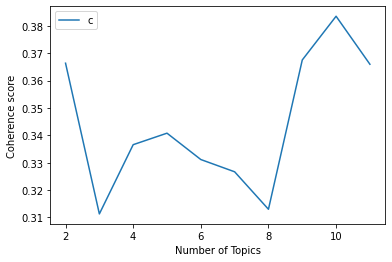

In [28]:
start,stop,step=2,12,1
clean_text_=preprocess_data(titles)
graph(clean_text_,start,stop,step)

In [29]:
number_of_topics=2
words=10
clean_text=preprocess_data(titles)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '-0.596*"scienc" + -0.506*"data" + -0.190*"write" + -0.190*"earth" + -0.190*"peer" + -0.190*"review" + -0.185*"1" + -0.185*"educ" + -0.179*"new" + -0.147*"comput"'), (1, '-0.353*"write" + -0.353*"peer" + -0.353*"review" + -0.353*"earth" + 0.278*"new" + 0.221*"scienc" + 0.216*"comput" + -0.177*"oceanographi" + -0.177*"gener" + -0.177*"larg"')]


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

# Write your answer here (no code needed for this question)
LDA has 20 point models and LSA has 2 theme models; but, although the two models have same number of terms, LSA has fewer dimensions than LDA. LSA is faster than LDA since there are only two topic versions. Despite the fact that the yields of both models are equivalent, both have preprocessing measures to lemmatize the sentences, and LDA is performed using the a diricilet strategy, while LSA is carried out in a probabilistic manner.